Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import datetime as dt
import glob

%matplotlib inline

In [4]:
def LeerPrecios(filename):
    for indice in range(10):
        DataFrame = pd.read_excel(filename,skiprows = indice ,usecols = list(range(25)))
        if DataFrame.iloc[0,0] == 'Fecha':
            DataFrame = pd.read_excel(filename,skiprows = indice+1, usecols = list(range(25)))
            break
    return DataFrame

In [5]:
Archivos = !ls precios/*.xls*
DataFrames = []
for filename in Archivos:
    DataFrames.append(LeerPrecios(filename))
DataFrames = pd.concat(DataFrames)
DataFrames = pd.melt(DataFrames,id_vars = 'Fecha')
DataFrames.columns = ['Fecha','Hora','Precio']

In [6]:
print(DataFrames)

             Fecha Hora      Precio
0       1995-07-20    0         NaN
1       1995-07-21    0    1.073000
2       1995-07-22    0    1.073000
3       1995-07-23    0    1.073000
4       1995-07-24    0    1.000000
5       1995-07-25    0    0.990000
6       1995-07-26    0    0.500000
7       1995-07-27    0    0.500000
8       1995-07-28    0    0.000000
9       1995-07-29    0    1.000000
10      1995-07-30    0    1.072000
11      1995-07-31    0    0.000000
12      1995-08-01    0    0.000000
13      1995-08-02    0    1.073000
14      1995-08-03    0    1.073000
15      1995-08-04    0    1.073000
16      1995-08-05    0    2.000000
17      1995-08-06    0    3.000000
18      1995-08-07    0    3.000000
19      1995-08-08    0    3.000000
20      1995-08-09    0   10.000000
21      1995-08-10    0   18.000000
22      1995-08-11    0   12.000000
23      1995-08-12    0   30.000000
24      1995-08-13    0   35.000000
25      1995-08-14    0   17.000000
26      1995-08-15    0    1

**2.--** Compute e imprima el número de registros con datos faltantes.

In [9]:
df_sin_nan = DataFrames.dropna() ##Elimino las lineas con datos faltantes

In [10]:
DataFrames.shape[0] - df_sin_nan.shape[0] ##Al dataframe original resto el dataframe sin faltantes

238

**3.--** Compute e imprima el número de registros duplicados.

In [11]:
df_SinRepetir = DataFrames.copy()

In [12]:
df_SinRepetir1=df_SinRepetir[df_SinRepetir.duplicated(keep=False)] ## Identifico los registros que se encuentran duplicados

In [13]:
df_SinRepetir2 = df_SinRepetir1.drop_duplicates() ## Elimino los registros Duplicados

In [14]:
Registros_Repetidos = df_SinRepetir1.shape[0]-df_SinRepetir2.shape[0]
print(Registros_Repetidos)

1951


**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [15]:
DataFrameDepurado = DataFrames.copy()
DataFrameDepurado = (DataFrameDepurado.drop_duplicates()) ##Elimino los registros duplicados
DataFrameDepurado = DataFrameDepurado.dropna() #Elimino los registros con sin datos
DataFrameDepurado.shape[0]

199819

**5.--** Compute y grafique el precio primedio diario.

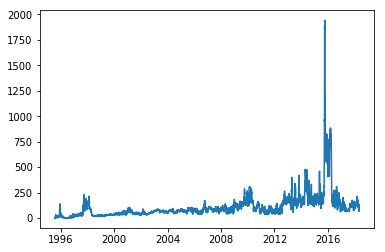

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
Promedio_diario = DataFrameDepurado.copy()
Promedio_diario['Fecha'] = pd.to_datetime(Promedio_diario['Fecha'])
Promedio_diario = Promedio_diario.groupby(['Fecha']).mean()['Precio']
plt.plot(Promedio_diario)

**6.--** Compute y grafique el precio máximo por mes

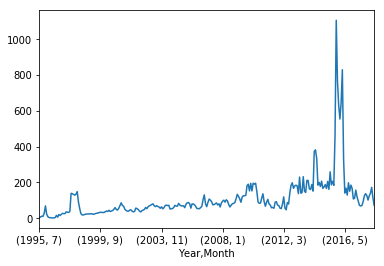

In [169]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from datetime import datetime
Promedio_Mensual = DataFrameDepurado.copy()
Promedio_Mensual['Fecha'] = pd.to_datetime(Promedio_Mensual['Fecha'])
Promedio_Mensual['Year'] = Promedio_Mensual['Fecha'].map(lambda x: x.year)
Promedio_Mensual['Month'] = Promedio_Mensual['Fecha'].map(lambda x: x.month)
Promedio_Mensual_1 = Promedio_Mensual.groupby(['Year','Month']).mean()['Precio']
Promedio_Mensual_1.plot()

**7.--** Compute y grafique el precio mínimo mensual.

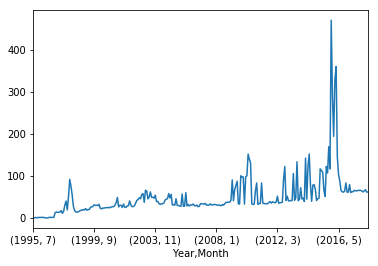

In [94]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from datetime import datetime
Minimo_Mensual = DataFrameDepurado.copy()
Minimo_Mensual['Fecha'] = pd.to_datetime(Minimo_Mensual['Fecha'])
Minimo_Mensual['Year'] = Minimo_Mensual['Fecha'].map(lambda x: x.year)
Minimo_Mensual['Month'] = Minimo_Mensual['Fecha'].map(lambda x: x.month)
Minimo_Mensual = Minimo_Mensual.groupby(['Year','Month']).min()['Precio']
Minimo_Mensual.plot()


**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

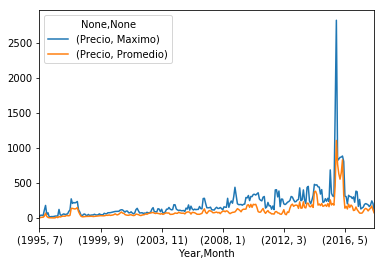

In [95]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from datetime import datetime
Promedio_Mensual = DataFrameDepurado.copy()
Promedio_Mensual['Fecha'] = pd.to_datetime(Promedio_Mensual['Fecha'])
Promedio_Mensual['Year'] = Promedio_Mensual['Fecha'].map(lambda x: x.year)
Promedio_Mensual['Month'] = Promedio_Mensual['Fecha'].map(lambda x: x.month)
Promedio_Mensual_1 = Promedio_Mensual.groupby(['Year','Month']).agg({'Precio': {'Maximo': np.max, 'Promedio': np.mean}})
Promedio_Mensual_1.plot()


**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

Text(0, 0.5, 'Frecuencia')

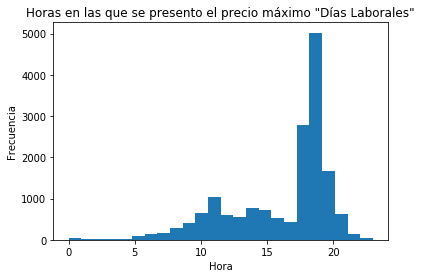

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from datetime import datetime

Dias_Laborales = DataFrameDepurado.copy()
Dias_Laborales['dia_semana'] = [a.weekday() for a in pd.to_datetime(Dias_Laborales['Fecha'])]
Dias_Laborales = Dias_Laborales[Dias_Laborales['dia_semana'] < 5]
Maximo_Dias_Laborales = Dias_Laborales.groupby('Fecha')['Precio'].max()
Hora_Precio_Maximo = pd.merge(Maximo_Dias_Laborales, Dias_Laborales, on=['Fecha','Precio'], how='inner')

a = list(map(int,Hora_Precio_Maximo['Hora'].tolist()))
plt.hist(a, bins=24)
plt.title('Horas en las que se presento el precio máximo "Días Laborales"')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

Text(0, 0.5, 'Frecuencia')

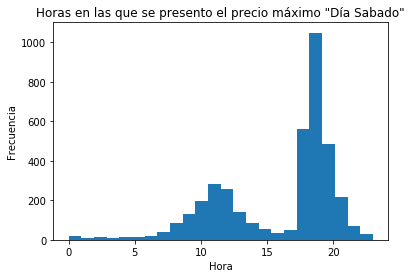

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from datetime import datetime

Dias_Sabados = DataFrameDepurado.copy()
Dias_Sabados['dia_semana'] = [a.weekday() for a in pd.to_datetime(Dias_Sabados['Fecha'])]
Dias_Sabados = Dias_Sabados[Dias_Sabados['dia_semana'] == 5]
Maximo_Sabados = Dias_Sabados.groupby('Fecha')['Precio'].max()
Hora_Precio_Maximo_Sabados = pd.merge(Maximo_Sabados, Dias_Sabados, on=['Fecha','Precio'], how='inner')

a = list(map(int,Hora_Precio_Maximo_Sabados['Hora'].tolist()))
plt.hist(a, bins=24)
plt.title('Horas en las que se presento el precio máximo "Día Sabado"')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

Text(0, 0.5, 'Frecuencia')

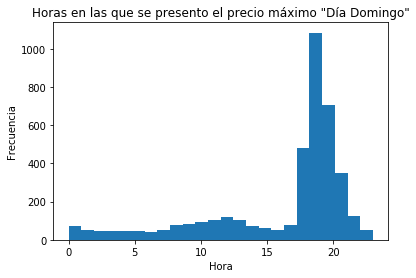

In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from datetime import datetime

Dias_Domingo = DataFrameDepurado.copy()
Dias_Domingo['dia_semana'] = [a.weekday() for a in pd.to_datetime(Dias_Domingo['Fecha'])]
Dias_Domingo = Dias_Domingo[Dias_Domingo['dia_semana'] == 6]
Maximo_Domingo = Dias_Domingo.groupby('Fecha')['Precio'].max()
Hora_Precio_Maximo_Domingo = pd.merge(Maximo_Domingo, Dias_Domingo, on=['Fecha','Precio'], how='inner')

a = list(map(int,Hora_Precio_Maximo_Domingo['Hora'].tolist()))
plt.hist(a, bins=24)
plt.title('Horas en las que se presento el precio máximo "Día Domingo"')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [44]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from datetime import datetime
df = DataFrameDepurado.copy()
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Year'] = df['Fecha'].map(lambda x: x.year)
Minimo_Anual = df.groupby('Year')['Precio'].min()
Fecha_Minimo_Anual = pd.merge(Minimo_Anual, df, on=['Year','Precio'], how='inner')
Fecha_Minimo_Anual = Fecha_Minimo_Anual[['Fecha', 'Precio']]

print(Fecha_Minimo_Anual)


         Fecha     Precio
0   1995-07-28   0.000000
1   1995-07-31   0.000000
2   1995-08-01   0.000000
3   1995-10-13   0.000000
4   1995-07-28   0.000000
5   1995-07-31   0.000000
6   1995-08-01   0.000000
7   1995-10-13   0.000000
8   1995-07-28   0.000000
9   1995-07-29   0.000000
10  1995-07-30   0.000000
11  1995-07-31   0.000000
12  1995-08-01   0.000000
13  1995-10-13   0.000000
14  1995-07-28   0.000000
15  1995-07-29   0.000000
16  1995-07-30   0.000000
17  1995-07-31   0.000000
18  1995-08-01   0.000000
19  1995-10-13   0.000000
20  1995-07-28   0.000000
21  1995-07-30   0.000000
22  1995-07-31   0.000000
23  1995-08-01   0.000000
24  1995-07-29   0.000000
25  1995-07-30   0.000000
26  1995-07-31   0.000000
27  1995-08-01   0.000000
28  1995-07-31   0.000000
29  1995-07-31   0.000000
..         ...        ...
383 2016-12-09  61.100689
384 2016-12-09  61.100689
385 2016-12-09  61.100689
386 2016-12-09  61.100689
387 2016-12-09  61.100689
388 2016-12-09  61.100689
389 2016-12-

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

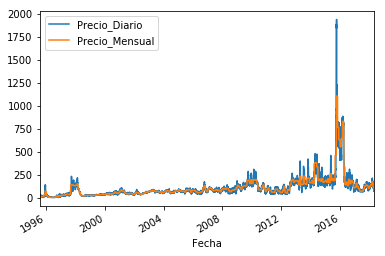

In [87]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from datetime import datetime
df = DataFrameDepurado.copy()
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Year'] = df['Fecha'].map(lambda x: x.year)
df['Month'] = df['Fecha'].map(lambda x: x.month)
Promedio_Mensual = df.groupby(['Year','Month'])['Precio'].mean()
Promedio_Diario = df.groupby(['Fecha'])['Precio'].mean()
Promedio_Mensual_Diario = pd.merge(df,Promedio_Mensual, on=['Year','Month'], how='inner',suffixes=('', '_Mensual'))
Promedio_Mensual_Diario = pd.merge(Promedio_Mensual_Diario,Promedio_Diario, on=['Fecha'], how='inner',suffixes=('', '_Diario'))
Promedio_Mensual_Diario = Promedio_Mensual_Diario[['Fecha', 'Precio_Mensual', 'Precio_Diario' ]]
Promedio_Mensual_Diario = Promedio_Mensual_Diario.set_index('Fecha')
plot = Promedio_Mensual_Diario[['Precio_Diario','Precio_Mensual']].plot()

---